In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
##extracting the data useful for us
X , y = mnist['data'] , mnist['target']

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y = y.astype(int)      ## converting the datatype from string to int

In [7]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

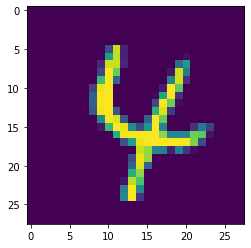

In [10]:
## viewing any image from the mnist dataset
## here we observe that X has 784 features which denotes 28 * 28 images flattened and each feature denotes a pixels intensity
anyImage = X[142].reshape(28,28)
plt.imshow(anyImage)

In [11]:
## creating datasets 
X_train , X_test , Y_train , Y_test = X[:60000] , X[60000:] , y[:60000] , y[60000:]

In [12]:
## shuffling our dataset 
randomShuffling = np.random.permutation(60000)
X_train , Y_train = X[randomShuffling] , y[randomShuffling]

In [13]:
## training a normal classifier for numbers equal to 3 or not equal to 3
y_train_3 = (Y_train == 3)
y_test_3 = (Y_test == 3)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter = 5 , tol = -np.infty , random_state = 61)
sgd_clf.fit(X_train,y_train_3)

SGDClassifier(max_iter=5, random_state=61, tol=-inf)

In [14]:
print(sgd_clf.predict([X[61]]))

[False]


In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.96715, 0.9646 , 0.9539 ])

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf , X_train , y_train_3,cv = 3)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3,y_train_predict)

array([[52602,  1267],
       [ 1020,  5111]], dtype=int64)

In [18]:
## 5229/(3044+5229)
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_3,y_train_predict)

0.8013483850736908

In [19]:
recall_score(y_train_3,y_train_predict)

0.8336323601370087

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_3,y_train_predict)

0.8171716364217763

In [21]:
y_scores = sgd_clf.decision_function([X[61]])
y_scores

array([-236709.65152125])

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3,
                             method="decision_function")

In [23]:
y_scores

array([ -920858.69383085,  -279982.02280266, -1094679.9566232 , ...,
         174820.98707517,  -789053.50981285,  -118184.30150835])

In [24]:
from sklearn.metrics import precision_recall_curve
precisions , recalls , thresholds = precision_recall_curve(y_train_3, y_scores)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 10)
knc.fit(X_train,Y_train)
print(knc.predict(X_test))